# Canaries
## Creating an histogram from each of the sarifo rtb time series
(time,qps_cap,qps_eff,avg_lat,max_lat,timeouts,bids)

Parsing data from safirortb.log

In [74]:
!./get_logs.sh 172.18.5.14 1000000 chiquita
!./get_logs.sh 172.18.5.212 1000000 panoptic
!./get_logs.sh 172.18.6.30 1000000 prod
!./parse_logs.sh chiquita
!./parse_logs.sh panoptic
!./parse_prod_logs.sh prod
#!cat ../data/silver.csv | sed s'/.$//' > ../data/silver1.csv
!ls ../data/

chiquita.csv  panoptic.csv  prod1.csv  prod.log
chiquita.log  panoptic.log  prod.csv


In [75]:
import numpy as np
import os
from stats_util import Type, get_serie
import math

path = os.getcwd()
path 
chiquita_ds = np.loadtxt(path + "/../data/chiquita.csv", delimiter=",")
chiquita_ds = np.delete(chiquita_ds, [1,], axis=1)

panoptic_ds = np.loadtxt(path + "/../data/panoptic.csv", delimiter=",")
panoptic_ds = np.delete(panoptic_ds, [1,], axis=1)

prod_ds = np.loadtxt(path + "/../data/prod.csv", delimiter=",")
prod_ds = np.delete(prod_ds, [1,], axis=1)


In [76]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
%matplotlib inline
figure(num=None, figsize=(15, 7), dpi=180, facecolor='w', edgecolor='k')
chiquita = get_serie(chiquita_ds, Type.qps_cap, None, None)
panoptic = get_serie(panoptic_ds, Type.qps_cap, None, None)
prod = get_serie(prod_ds, Type.qps_cap, None, None)

<Figure size 2700x1260 with 0 Axes>

((141.14771760703147, 10.533743410990157),
 (140.3214446952596, 11.444079330059937))

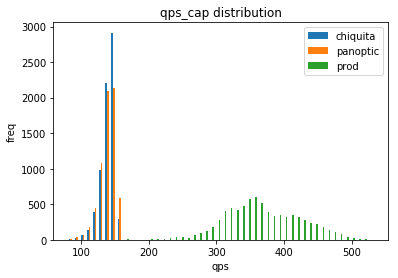

In [77]:
plt.hist([chiquita, panoptic,prod], bins=50, label=['chiquita', 'panoptic','prod'])
plt.title('qps_cap distribution')
plt.xlabel('qps')
plt.ylabel('freq');
plt.legend(loc='upper right')
(chiquita.mean(),math.sqrt(chiquita.var())),(panoptic.mean(),math.sqrt(panoptic.var()))

((120.20513184009073, 5.6510394103443655),
 (103.93965387509405, 10.23553174183985),
 (200.43646195442255, 37.53983403233549))

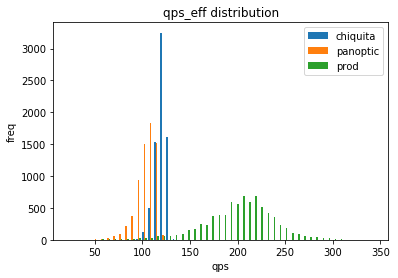

In [78]:
chiquita = get_serie(chiquita_ds, Type.qps_eff, None, None)
panoptic = get_serie(panoptic_ds, Type.qps_eff, None, None)
prod = get_serie(prod_ds, Type.qps_eff, None, None)
plt.hist([chiquita, panoptic,prod], bins=50, label=['chiquita', 'panoptic','prod'])
plt.title('qps_eff distribution')
plt.xlabel('qps')
plt.ylabel('freq');
plt.legend(loc='upper right')
(chiquita.mean(),math.sqrt(chiquita.var())),(panoptic.mean(),math.sqrt(panoptic.var())),(prod.mean(),math.sqrt(prod.var()))

((0.007104664020413949, 0.0006129956092146286),
 (0.0071548683220466515, 0.0006681437748004794),
 (0.0027910518861851423, 0.0004514440595543337))

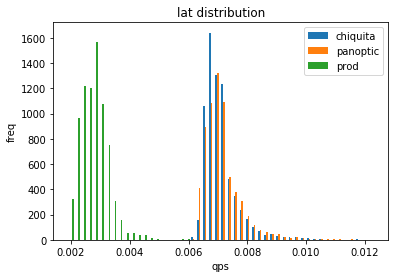

In [85]:
chiquita = get_serie(chiquita_ds, Type.avg_lat, None, None)
panoptic = get_serie(panoptic_ds, Type.avg_lat, None, None)
prod = get_serie(prod_ds, Type.avg_lat, None, None)
plt.hist([chiquita, panoptic,prod], bins=50, label=['chiquita', 'panoptic','prod'])
plt.title('lat distribution')
plt.xlabel('qps')
plt.ylabel('freq');
plt.legend(loc='upper right')
(chiquita.mean(),math.sqrt(chiquita.var())),(panoptic.mean(),math.sqrt(panoptic.var())),(prod.mean(),math.sqrt(prod.var()))

((20.883328607882053, 5.6194528700894075),
 (18.491798344620015, 4.907524098564953),
 (13.925325093343634, 3.94866454151348))

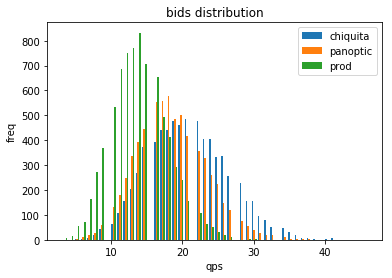

In [84]:
chiquita = get_serie(chiquita_ds, Type.bids, None, None)
panoptic = get_serie(panoptic_ds, Type.bids, None, None)
prod = get_serie(prod_ds, Type.bids, None, None)
plt.hist([chiquita, panoptic,prod], bins=50, label=['chiquita', 'panoptic','prod'])
plt.title('bids distribution')
plt.xlabel('qps')
plt.ylabel('freq');
plt.legend(loc='upper right')
(chiquita.mean(),math.sqrt(chiquita.var())),(panoptic.mean(),math.sqrt(panoptic.var())),(prod.mean(),math.sqrt(prod.var()))


In [83]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
%matplotlib inline
figure(num=None, figsize=(15, 7), dpi=80, facecolor='w', edgecolor='k')

plt.plot(silver_ds[:,1], label="qps_cap_silver")
plt.plot(silver_ds[:, 2], label="qps_eff_silver")
plt.plot(silver_ds[:, 3], label="avg_lat_silver")
plt.plot(silver_ds[:, 4], label="bid_silver")

plt.plot(canary_ds[:,1], label="qps_cap_production")
plt.plot(canary_ds[:, 2], label="qps_eff_production")
plt.plot(canary_ds[:, 3], label="avg_lat_production")
plt.plot(canary_ds[:, 4], label="bid_production")

plt.hist(dataset,bins=50)
plt.gca().set_xscale("log", nonposx='clip')
plt.gca().set_yscale("log", nonposy='clip')
plt.title('time serie')
plt.xlabel('queue size')
plt.ylabel('auctions');
plt.legend()
plt.show()

NameError: name 'silver_ds' is not defined

<Figure size 1200x560 with 0 Axes>